In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Allanime.csv')

In [3]:
data = data.drop_duplicates(subset=['Title'])
data

,Title,Genres,Episodes,Source,Producers,Scores,Time,Popularity,Synopsis
0,Shingeki no Kyojin,"['Action', 'Military', 'Mystery', 'Super Power...",25,Manga,"Production I.G, Wit Studio",8.51,"Apr 7, 2013, 01:58 (JST)","3,031,227","Centuries ago, mankind was slaughtered to near..."
1,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...",64,Manga,Bones,9.16,"Apr 5, 2009, 17:00 (JST)","2,594,928","""In order for something to be obtained, someth..."
2,Sword Art Online,"['Action', 'Game', 'Adventure', 'Romance', 'Fa...",25,Light novel,A-1 Pictures,7.21,"Jul 8, 2012, 00:00 (JST)","2,516,088","In the year 2022, virtual reality has progress..."
3,One Punch Man,"['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...",12,Web manga,Madhouse,8.53,"Oct 5, 2015, 01:05 (JST)","2,496,962",The seemingly ordinary and unimpressive Saitam...
4,Boku no Hero Academia,"['Action', 'Comedy', 'School', 'Shounen', 'Sup...",13,Manga,Bones,8.00,"Apr 3, 2016, 17:00 (JST)","2,337,857","The appearance of ""quirks,"" newly discovered s..."
...,...,...,...,...,...,...,...,...,...
52115,Yami no Teio: Kyuuketsuki Dracula,['Vampire'],1,Other,Toei Animation,3.73,"Aug 19, 1980","3,333","On a seemingly normal night in Boston, a satan..."
52116,Vampire in the Garden,['Vampire'],?,Original,Wit Studio,NaN,"??? ??, 2021","3,203","Once, vampires and humans lived in harmony. No..."
52160,Pico: My Little Summer Story,['Yaoi'],1,Original,Natural High,4.41,"Nov 11, 2007","11,570",An edited version of the first OVA titled pico...
52166,Yebisu Celebrities 1st,['Yaoi'],1,Manga,GARDEN LODGE,5.94,"May 28, 2010","8,531",When Haruka Fujinami starts his job at Yebisu ...


In [4]:
import numpy as np
data.loc[pd.to_numeric(data['Episodes'], errors='coerce').isnull(), ['Episodes']] = np.nan

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18331 entries, 0 to 52174
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       18331 non-null  object 
 1   Genres      18331 non-null  object 
 2   Episodes    17816 non-null  object 
 3   Source      18331 non-null  object 
 4   Producers   18331 non-null  object 
 5   Scores      13150 non-null  float64
 6   Time        18331 non-null  object 
 7   Popularity  18331 non-null  object 
 8   Synopsis    18331 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [6]:
data['Popularity'] = data['Popularity'].replace(',','', regex=True)
data.loc[pd.to_numeric(data['Popularity'], errors='coerce').isnull(), ['Popularity']] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18331 entries, 0 to 52174
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       18331 non-null  object 
 1   Genres      18331 non-null  object 
 2   Episodes    17816 non-null  object 
 3   Source      18331 non-null  object 
 4   Producers   18331 non-null  object 
 5   Scores      13150 non-null  float64
 6   Time        18331 non-null  object 
 7   Popularity  18331 non-null  object 
 8   Synopsis    18331 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [7]:
data.groupby(['Source']).count()

,Title,Genres,Episodes,Producers,Scores,Time,Popularity,Synopsis
Source,,,,,,,,
-,3619,3619,3601,3619,2025,3619,3619,3619
4-koma manga,289,289,283,289,253,289,289,289
Book,119,119,117,119,70,119,119,119
Card game,62,62,59,62,59,62,62,62
Digital manga,16,16,15,16,14,16,16,16
Game,910,910,871,910,770,910,910,910
Light novel,801,801,755,801,745,801,801,801
Manga,3964,3964,3843,3964,3572,3964,3964,3964
Music,322,322,317,322,235,322,322,322


In [8]:
data.loc[data['Source'] == '-', ['Source']] = np.nan

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18331 entries, 0 to 52174
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       18331 non-null  object 
 1   Genres      18331 non-null  object 
 2   Episodes    17816 non-null  object 
 3   Source      14712 non-null  object 
 4   Producers   18331 non-null  object 
 5   Scores      13150 non-null  float64
 6   Time        18331 non-null  object 
 7   Popularity  18331 non-null  object 
 8   Synopsis    18331 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.4+ MB


In [10]:
data['Genres'] = data['Genres'].replace('\[','', regex=True)
data['Genres'] = data['Genres'].replace('\]','', regex=True)
data['Genres'] = data['Genres'].replace("'",'', regex=True)
genres = data['Genres'].tolist()
genres

['Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen',
 'Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen',
 'Action, Game, Adventure, Romance, Fantasy',
 'Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural',
 'Action, Comedy, School, Shounen, Super Power',
 'Action, Mystery, Horror, Psychological, Supernatural, Drama, Seinen',
 'Action, Adventure, Comedy, Super Power, Martial Arts, Shounen',
 'Action, Adventure, Fantasy, Shounen, Super Power',
 'Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen',
 'Action, Demons, Historical, Shounen, Supernatural',
 'Action, Comedy, Super Power, School, Shounen',
 'Action, Adventure, Comedy, Super Power, Martial Arts, Shounen',
 'Action, Military, Sci-Fi, Super Power, Drama, Mecha, School',
 'Action, Comedy, Drama, School, Supernatural',
 'Action, Adventure, Comedy, Supernatural, Shounen',
 'Action, Mystery, Psychological, Supernatural, Thriller, Shounen',
 'Action, Comedy, Super Power, School, Sho

In [16]:
s = ','.join(genres)
s = s.split(",")
s

['Action',
 ' Military',
 ' Mystery',
 ' Super Power',
 ' Drama',
 ' Fantasy',
 ' Shounen',
 'Action',
 ' Military',
 ' Adventure',
 ' Comedy',
 ' Drama',
 ' Magic',
 ' Fantasy',
 ' Shounen',
 'Action',
 ' Game',
 ' Adventure',
 ' Romance',
 ' Fantasy',
 'Action',
 ' Sci-Fi',
 ' Comedy',
 ' Parody',
 ' Super Power',
 ' Supernatural',
 'Action',
 ' Comedy',
 ' School',
 ' Shounen',
 ' Super Power',
 'Action',
 ' Mystery',
 ' Horror',
 ' Psychological',
 ' Supernatural',
 ' Drama',
 ' Seinen',
 'Action',
 ' Adventure',
 ' Comedy',
 ' Super Power',
 ' Martial Arts',
 ' Shounen',
 'Action',
 ' Adventure',
 ' Fantasy',
 ' Shounen',
 ' Super Power',
 'Action',
 ' Military',
 ' Mystery',
 ' Super Power',
 ' Drama',
 ' Fantasy',
 ' Shounen',
 'Action',
 ' Demons',
 ' Historical',
 ' Shounen',
 ' Supernatural',
 'Action',
 ' Comedy',
 ' Super Power',
 ' School',
 ' Shounen',
 'Action',
 ' Adventure',
 ' Comedy',
 ' Super Power',
 ' Martial Arts',
 ' Shounen',
 'Action',
 ' Military',
 ' Sci-Fi'

In [17]:
unique2 =[]
for title in s:
    title = title.strip()
    unique2.append(title)
unique2

['Action',
 'Military',
 'Mystery',
 'Super Power',
 'Drama',
 'Fantasy',
 'Shounen',
 'Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Action',
 'Game',
 'Adventure',
 'Romance',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Comedy',
 'Parody',
 'Super Power',
 'Supernatural',
 'Action',
 'Comedy',
 'School',
 'Shounen',
 'Super Power',
 'Action',
 'Mystery',
 'Horror',
 'Psychological',
 'Supernatural',
 'Drama',
 'Seinen',
 'Action',
 'Adventure',
 'Comedy',
 'Super Power',
 'Martial Arts',
 'Shounen',
 'Action',
 'Adventure',
 'Fantasy',
 'Shounen',
 'Super Power',
 'Action',
 'Military',
 'Mystery',
 'Super Power',
 'Drama',
 'Fantasy',
 'Shounen',
 'Action',
 'Demons',
 'Historical',
 'Shounen',
 'Supernatural',
 'Action',
 'Comedy',
 'Super Power',
 'School',
 'Shounen',
 'Action',
 'Adventure',
 'Comedy',
 'Super Power',
 'Martial Arts',
 'Shounen',
 'Action',
 'Military',
 'Sci-Fi',
 'Super Power',
 'Drama',
 'Mecha',
 'School',
 'Action',
 '

In [18]:
unique = list(set(unique2))
unique

['Josei',
 'Military',
 'Action',
 'Yuri',
 'Vampire',
 'Shounen',
 'Hentai',
 'Mystery',
 'Slice of Life',
 'Magic',
 'Mecha',
 'Harem',
 'Shounen Ai',
 'Martial Arts',
 'Historical',
 'Shoujo Ai',
 'Sports',
 'Police',
 'Fantasy',
 'Supernatural',
 'Space',
 'Seinen',
 'Yaoi',
 'School',
 'Psychological',
 'Adventure',
 'Cars',
 'Shoujo',
 'Dementia',
 'Super Power',
 'Samurai',
 'Comedy',
 'Parody',
 'Romance',
 'Music',
 'Sci-Fi',
 'Ecchi',
 'Kids',
 'Horror',
 'Thriller',
 'Game',
 'Drama',
 'Demons']

In [19]:
for title in unique:
    data.loc[data['Genres'].str.find(title) != -1, ['Genre:'+ title]] = 1

In [20]:
data

,Title,Genres,Episodes,Source,Producers,Scores,Time,Popularity,Synopsis,Genre:Josei,...,Genre:Romance,Genre:Music,Genre:Sci-Fi,Genre:Ecchi,Genre:Kids,Genre:Horror,Genre:Thriller,Genre:Game,Genre:Drama,Genre:Demons
0,Shingeki no Kyojin,"Action, Military, Mystery, Super Power, Drama,...",25,Manga,"Production I.G, Wit Studio",8.51,"Apr 7, 2013, 01:58 (JST)",3031227,"Centuries ago, mankind was slaughtered to near...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Fullmetal Alchemist: Brotherhood,"Action, Military, Adventure, Comedy, Drama, Ma...",64,Manga,Bones,9.16,"Apr 5, 2009, 17:00 (JST)",2594928,"""In order for something to be obtained, someth...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,Sword Art Online,"Action, Game, Adventure, Romance, Fantasy",25,Light novel,A-1 Pictures,7.21,"Jul 8, 2012, 00:00 (JST)",2516088,"In the year 2022, virtual reality has progress...",NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,One Punch Man,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",12,Web manga,Madhouse,8.53,"Oct 5, 2015, 01:05 (JST)",2496962,The seemingly ordinary and unimpressive Saitam...,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",13,Manga,Bones,8.00,"Apr 3, 2016, 17:00 (JST)",2337857,"The appearance of ""quirks,"" newly discovered s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52115,Yami no Teio: Kyuuketsuki Dracula,Vampire,1,Other,Toei Animation,3.73,"Aug 19, 1980",3333,"On a seemingly normal night in Boston, a satan...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52116,Vampire in the Garden,Vampire,NaN,Original,Wit Studio,NaN,"??? ??, 2021",3203,"Once, vampires and humans lived in harmony. No...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52160,Pico: My Little Summer Story,Yaoi,1,Original,Natural High,4.41,"Nov 11, 2007",11570,An edited version of the first OVA titled pico...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52166,Yebisu Celebrities 1st,Yaoi,1,Manga,GARDEN LODGE,5.94,"May 28, 2010",8531,When Haruka Fujinami starts his job at Yebisu ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
genre_cols = data.filter(regex='Genre:')
genre_cols

,Genre:Josei,Genre:Military,Genre:Action,Genre:Yuri,Genre:Vampire,Genre:Shounen,Genre:Hentai,Genre:Mystery,Genre:Slice of Life,Genre:Magic,...,Genre:Romance,Genre:Music,Genre:Sci-Fi,Genre:Ecchi,Genre:Kids,Genre:Horror,Genre:Thriller,Genre:Game,Genre:Drama,Genre:Demons
0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52115,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52116,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
anime_genre = pd.concat([data[["Title", "Scores","Popularity"]], genre_cols], axis =1, join ="outer")

In [24]:
anime_genre

,Title,Scores,Popularity,Genre:Josei,Genre:Military,Genre:Action,Genre:Yuri,Genre:Vampire,Genre:Shounen,Genre:Hentai,...,Genre:Romance,Genre:Music,Genre:Sci-Fi,Genre:Ecchi,Genre:Kids,Genre:Horror,Genre:Thriller,Genre:Game,Genre:Drama,Genre:Demons
0,Shingeki no Kyojin,8.51,3031227,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Fullmetal Alchemist: Brotherhood,9.16,2594928,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,Sword Art Online,7.21,2516088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,One Punch Man,8.53,2496962,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia,8.00,2337857,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52115,Yami no Teio: Kyuuketsuki Dracula,3.73,3333,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52116,Vampire in the Garden,NaN,3203,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52160,Pico: My Little Summer Story,4.41,11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52166,Yebisu Celebrities 1st,5.94,8531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
anime_genre.to_csv("All Anime Genre.csv", index=False)

In [16]:
df =  pd.read_csv('All Anime Genre.csv')

In [17]:
df

,Title,Scores,Popularity,Genre:Josei,Genre:Military,Genre:Action,Genre:Yuri,Genre:Vampire,Genre:Shounen,Genre:Hentai,...,Genre:Romance,Genre:Music,Genre:Sci-Fi,Genre:Ecchi,Genre:Kids,Genre:Horror,Genre:Thriller,Genre:Game,Genre:Drama,Genre:Demons
0,Shingeki no Kyojin,8.51,3031227,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Fullmetal Alchemist: Brotherhood,9.16,2594928,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,Sword Art Online,7.21,2516088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,One Punch Man,8.53,2496962,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia,8.00,2337857,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,Yami no Teio: Kyuuketsuki Dracula,3.73,3333,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18327,Vampire in the Garden,NaN,3203,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18328,Pico: My Little Summer Story,4.41,11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18329,Yebisu Celebrities 1st,5.94,8531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18331 entries, 0 to 18330
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18331 non-null  object 
 1   Scores               13150 non-null  float64
 2   Popularity           18331 non-null  int64  
 3   Genre:Josei          97 non-null     float64
 4   Genre:Military       593 non-null    float64
 5   Genre:Action         4057 non-null   float64
 6   Genre:Yuri           32 non-null     float64
 7   Genre:Vampire        140 non-null    float64
 8   Genre:Shounen        2095 non-null   float64
 9   Genre:Hentai         1366 non-null   float64
 10  Genre:Mystery        751 non-null    float64
 11  Genre:Slice of Life  2006 non-null   float64
 12  Genre:Magic          1117 non-null   float64
 13  Genre:Mecha          1125 non-null   float64
 14  Genre:Harem          409 non-null    float64
 15  Genre:Shounen Ai     105 non-null   

In [19]:
df = df[df['Scores'].notna()]

In [20]:
df = df.fillna(0)

In [21]:
corr = df.corr()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (80,48))
sns.heatmap(corr, annot = True)

<AxesSubplot:>

<AxesSubplot:>

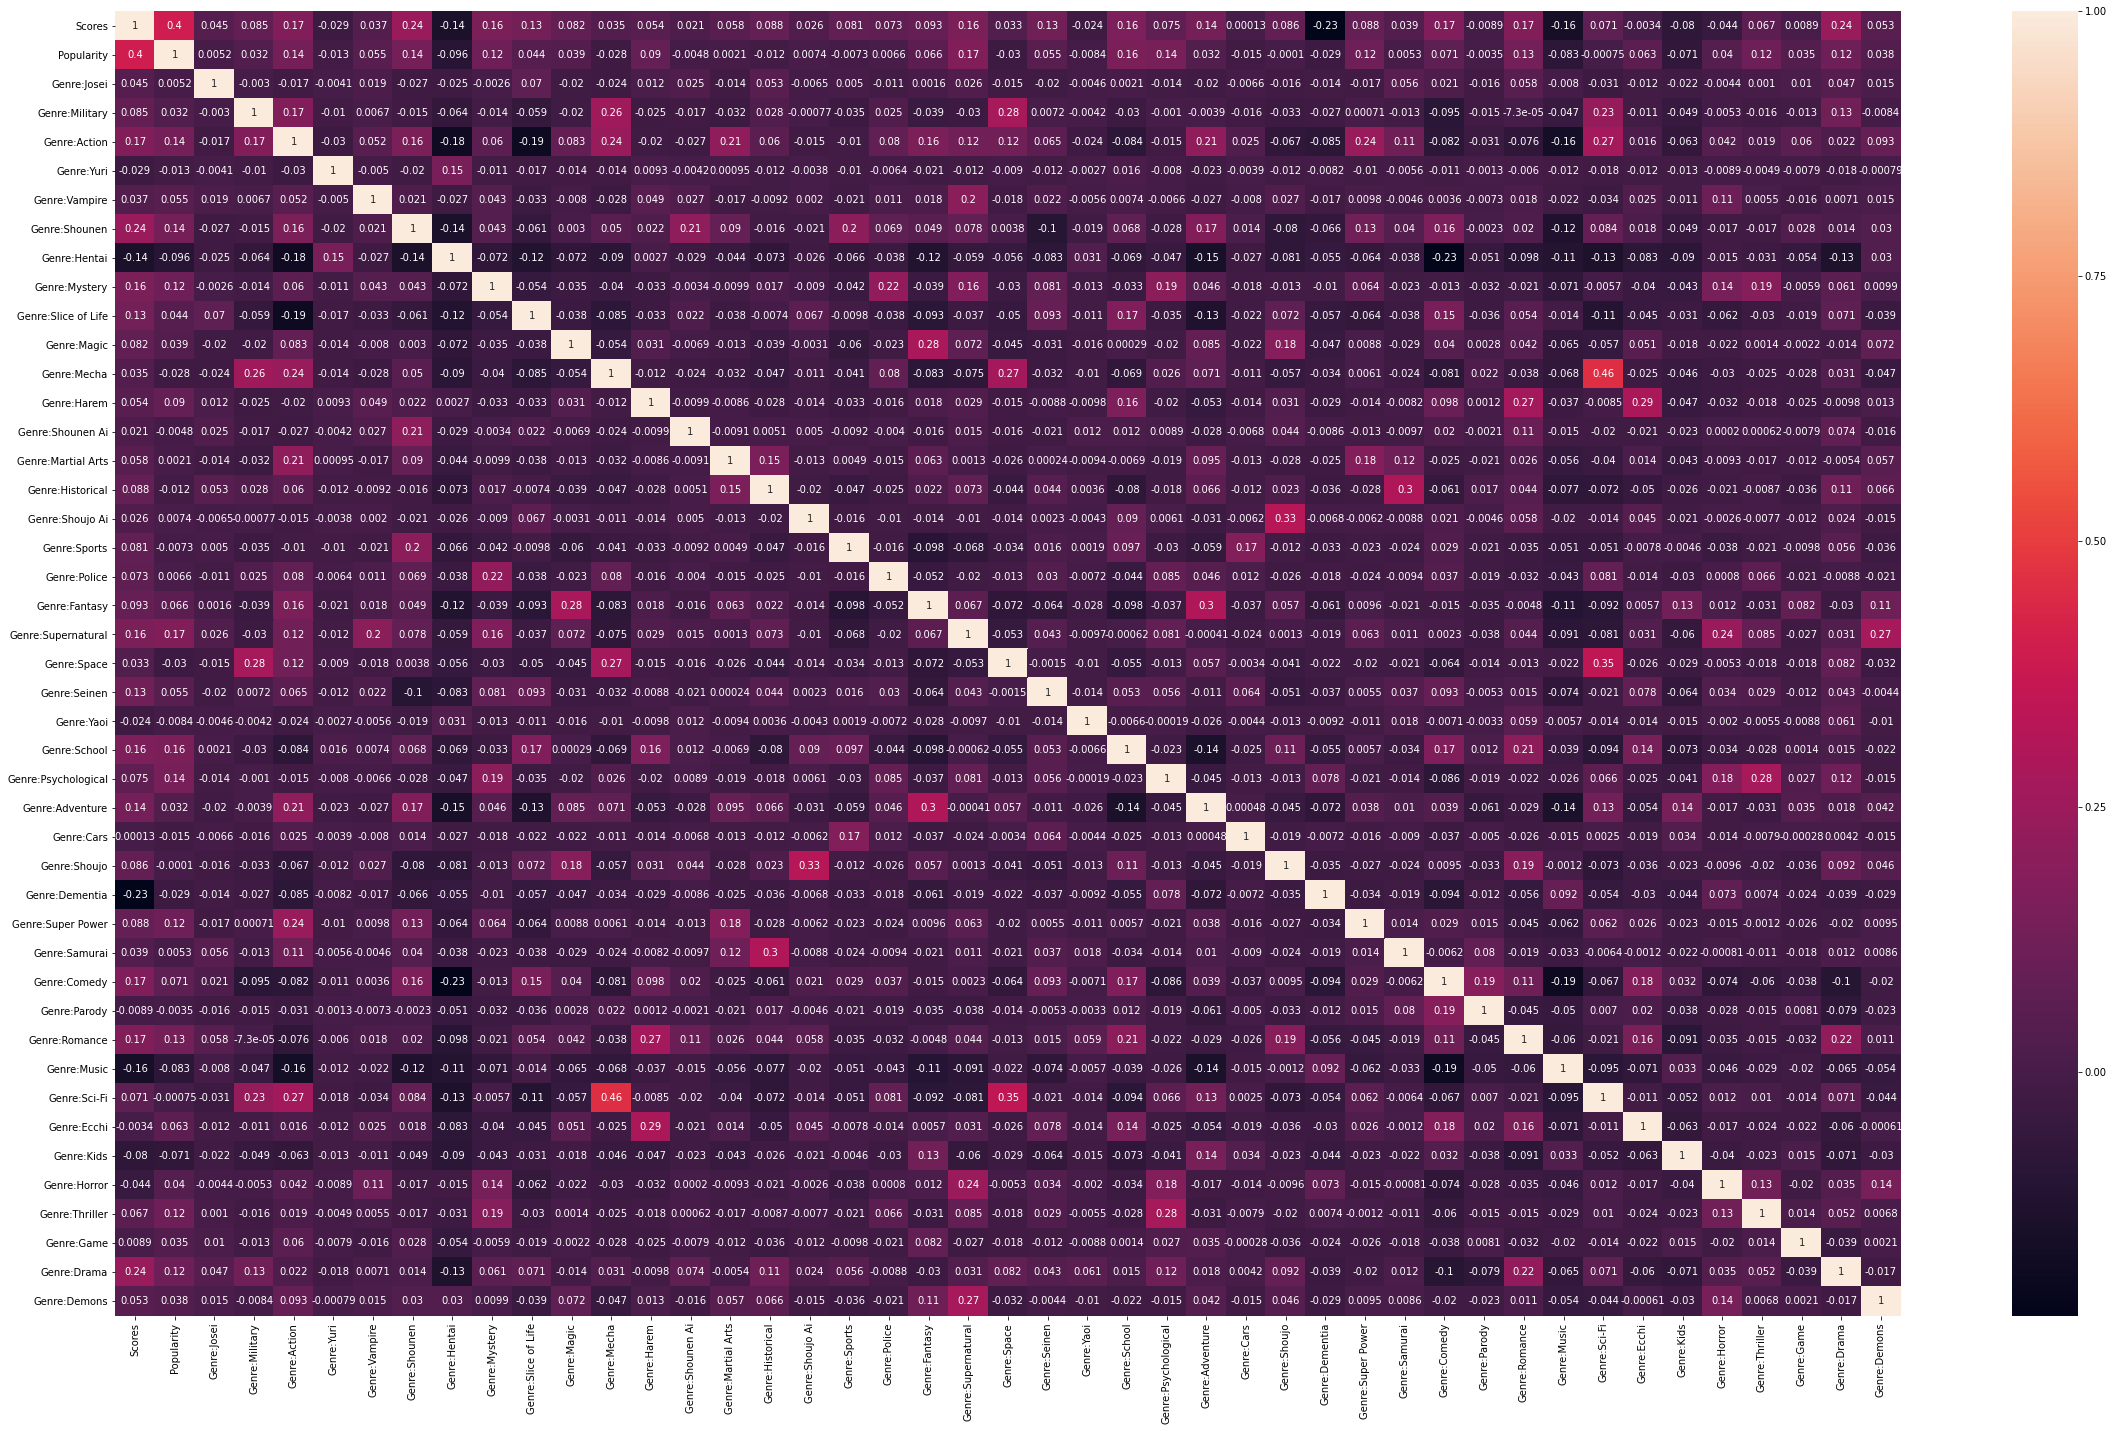

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (40,24))
sns.heatmap(corr, annot = True)

In [33]:
drama = df.loc[df['Genre:Drama'] == 1]
dramashounen = drama.loc[drama['Genre:Shounen'] == 1]
dramashounen.head(20)

,Title,Scores,Popularity,Genre:Josei,Genre:Military,Genre:Action,Genre:Yuri,Genre:Vampire,Genre:Shounen,Genre:Hentai,...,Genre:Romance,Genre:Music,Genre:Sci-Fi,Genre:Ecchi,Genre:Kids,Genre:Horror,Genre:Thriller,Genre:Game,Genre:Drama,Genre:Demons
0,Shingeki no Kyojin,8.51,3031227,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Fullmetal Alchemist: Brotherhood,9.16,2594928,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,Shingeki no Kyojin Season 2,8.49,2000495,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,Akame ga Kill!,7.48,1651391,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,Shingeki no Kyojin Season 3,8.63,1644903,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,One Piece,8.59,1632410,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24,Shingeki no Kyojin Season 3 Part 2,9.10,1515380,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,Shingeki no Kyojin: The Final Season,8.93,1269451,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,Fullmetal Alchemist,8.14,1265234,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57,Owari no Seraph,7.49,1039859,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
data.groupby(['Producers']).count()

,Title,Genres,Episodes,Source,Scores,Time,Popularity,Synopsis
Producers,,,,,,,,
-,6849,6849,6607,6849,3284,6849,6849,6849
-,242,242,241,242,235,242,242,242
10Gauge,5,5,5,5,3,5,5,5
"10Gauge, Studio DURIAN",1,1,1,1,1,1,1,1
"10Gauge, Tatsunoko Production",1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
monofilmo,2,2,2,2,2,2,2,2
pH Studio,5,5,5,5,4,5,5,5
production doA,3,3,3,3,3,3,3,3


In [7]:
producers = data['Producers'].tolist()
p = ','.join(producers)
p = p.split(",")
unique2 =[]
for producer in p:
    producer = producer.strip()
    unique2.append(producer)
unique2

['Production I.G',
 'Wit Studio',
 'Bones',
 'A-1 Pictures',
 'Madhouse',
 'Bones',
 'Studio Pierrot',
 'Studio Pierrot',
 'Madhouse',
 'Wit Studio',
 'ufotable',
 'Bones',
 'Studio Pierrot',
 'Sunrise',
 'P.A. Works',
 'Bones',
 'asread.',
 'Bones',
 'A-1 Pictures',
 'White Fox',
 'Wit Studio',
 'Toei Animation',
 'A-1 Pictures',
 'A-1 Pictures',
 'Lerche',
 'Wit Studio',
 'Bones',
 'A-1 Pictures',
 'Satelight',
 'Studio Pierrot',
 'Madhouse',
 'Studio Pierrot',
 'Sunrise',
 'Sunrise',
 'Trigger',
 'MAPPA',
 'Gainax',
 'Tatsunoko Production',
 'Bones',
 'Production I.G',
 'Gainax',
 'Arms',
 'MAPPA',
 'Bones',
 'Bones',
 'Madhouse',
 'A-1 Pictures',
 'CloverWorks',
 'Trigger',
 'ufotable',
 'J.C.Staff',
 'J.C.Staff',
 "Brain's Base",
 'Madhouse',
 'David Production',
 'Bones',
 'Kinema Citrus',
 'Studio Pierrot',
 'Lerche',
 'Bones',
 'Manglobe',
 'Production I.G',
 'Wit Studio',
 'Manglobe',
 'Toei Animation',
 'Studio Ghibli',
 'A-1 Pictures',
 'Bones',
 '8bit',
 'Satelight',
 'Davi

In [8]:
uniquep = list(set(unique2))
uniquep

['Wit Studio',
 'Sega Interactive',
 'Ezόla',
 'Alpha Animation',
 'Shin-Ei Animation',
 'NHK Enterprises',
 'Heewon Entertainment',
 'Colored Pencil Animation',
 'View Works',
 'Asatsu DK',
 'Sugar Boy',
 'Ark',
 'Usagi Ou',
 'Shanghai Hippo Animation',
 'Dangun Pictures',
 'Lide',
 'Nippon Ramayana Film Co.',
 'NHK',
 'Speed Inc.',
 'Qubic Pictures',
 'Romanov Films',
 'Lilix',
 'Studio Flag',
 'PONOS Corporation',
 'Telecom Animation Film',
 'Jinnis Animation Studios',
 'TYMOTE',
 'A.C.G.T.',
 'BigFireBird Animation',
 'Stingray',
 'Gaina',
 'Sunwoo Entertainment',
 'Office DCI',
 'Green Monster Team',
 'Kaname Productions',
 'Shaft',
 'Dai Nippon Printing',
 'CG Year',
 'JJJOY Animation Studios',
 'Zero-G Room',
 'Five Ways',
 'FOREST Hunting One',
 'Tsukimidou',
 'Studio Hakk',
 'China Literature Limited',
 'Directions',
 'Mimoid',
 'Pony Canyon',
 'BOMB! CUTE! BOMB!',
 'KOO-KI',
 'GoHands',
 'animate Film',
 'PoRO',
 'Pierrot Plus',
 'Lapin Track',
 '5 Inc.',
 'Buemon',
 'asread.

In [9]:
len(uniquep)

788

In [10]:
for producer in uniquep:
    data.loc[data['Producers'].str.find(producer) != -1, ['Producer:'+ producer]] = 1

In [11]:
data

,Title,Genres,Episodes,Source,Producers,Scores,Time,Popularity,Synopsis,Producer:Wit Studio,...,Producer:studio MOTHER,Producer:Tokyo Media Connections,Producer:Tomoyasu Murata Company,Producer:Studio Khronos,Producer:CUCURI,Producer:Tomovies,Producer:Monster's Egg,Producer:l-a-unch・BOX,Producer:Picture Magic,Producer:Fuji TV
0,Shingeki no Kyojin,"['Action', 'Military', 'Mystery', 'Super Power...",25,Manga,"Production I.G, Wit Studio",8.51,"Apr 7, 2013, 01:58 (JST)","3,031,227","Centuries ago, mankind was slaughtered to near...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...",64,Manga,Bones,9.16,"Apr 5, 2009, 17:00 (JST)","2,594,928","""In order for something to be obtained, someth...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sword Art Online,"['Action', 'Game', 'Adventure', 'Romance', 'Fa...",25,Light novel,A-1 Pictures,7.21,"Jul 8, 2012, 00:00 (JST)","2,516,088","In the year 2022, virtual reality has progress...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,One Punch Man,"['Action', 'Sci-Fi', 'Comedy', 'Parody', 'Supe...",12,Web manga,Madhouse,8.53,"Oct 5, 2015, 01:05 (JST)","2,496,962",The seemingly ordinary and unimpressive Saitam...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia,"['Action', 'Comedy', 'School', 'Shounen', 'Sup...",13,Manga,Bones,8.00,"Apr 3, 2016, 17:00 (JST)","2,337,857","The appearance of ""quirks,"" newly discovered s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52115,Yami no Teio: Kyuuketsuki Dracula,['Vampire'],1,Other,Toei Animation,3.73,"Aug 19, 1980","3,333","On a seemingly normal night in Boston, a satan...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52116,Vampire in the Garden,['Vampire'],NaN,Original,Wit Studio,NaN,"??? ??, 2021","3,203","Once, vampires and humans lived in harmony. No...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52160,Pico: My Little Summer Story,['Yaoi'],1,Original,Natural High,4.41,"Nov 11, 2007","11,570",An edited version of the first OVA titled pico...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52166,Yebisu Celebrities 1st,['Yaoi'],1,Manga,GARDEN LODGE,5.94,"May 28, 2010","8,531",When Haruka Fujinami starts his job at Yebisu ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
producer_cols = data.filter(regex='Producer:')

In [13]:
anime_producer = pd.concat([data[["Title", "Scores","Popularity"]], producer_cols], axis =1, join ="outer")

In [14]:
anime_producer

,Title,Scores,Popularity,Producer:Wit Studio,Producer:Sega Interactive,Producer:Ezόla,Producer:Alpha Animation,Producer:Shin-Ei Animation,Producer:NHK Enterprises,Producer:Heewon Entertainment,...,Producer:studio MOTHER,Producer:Tokyo Media Connections,Producer:Tomoyasu Murata Company,Producer:Studio Khronos,Producer:CUCURI,Producer:Tomovies,Producer:Monster's Egg,Producer:l-a-unch・BOX,Producer:Picture Magic,Producer:Fuji TV
0,Shingeki no Kyojin,8.51,"3,031,227",1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fullmetal Alchemist: Brotherhood,9.16,"2,594,928",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sword Art Online,7.21,"2,516,088",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,One Punch Man,8.53,"2,496,962",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia,8.00,"2,337,857",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52115,Yami no Teio: Kyuuketsuki Dracula,3.73,"3,333",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52116,Vampire in the Garden,NaN,"3,203",1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52160,Pico: My Little Summer Story,4.41,"11,570",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52166,Yebisu Celebrities 1st,5.94,"8,531",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
anime_producer.to_csv("All Anime Producer.csv", index=False)

In [34]:
data2 = pd.read_csv("All Anime Producer.csv")

C:\Users\Mana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
data2['Popularity'] = data2['Popularity'].replace(',','', regex=True)
data2.loc[pd.to_numeric(data2['Popularity'], errors='coerce').isnull(), ['Popularity']] = np.nan
data2

,Title,Scores,Popularity,Producer:Wit Studio,Producer:Sega Interactive,Producer:Ezόla,Producer:Alpha Animation,Producer:Shin-Ei Animation,Producer:NHK Enterprises,Producer:Heewon Entertainment,...,Producer:studio MOTHER,Producer:Tokyo Media Connections,Producer:Tomoyasu Murata Company,Producer:Studio Khronos,Producer:CUCURI,Producer:Tomovies,Producer:Monster's Egg,Producer:l-a-unch・BOX,Producer:Picture Magic,Producer:Fuji TV
0,Shingeki no Kyojin,8.51,3031227,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fullmetal Alchemist: Brotherhood,9.16,2594928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sword Art Online,7.21,2516088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,One Punch Man,8.53,2496962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boku no Hero Academia,8.00,2337857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,Yami no Teio: Kyuuketsuki Dracula,3.73,3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18327,Vampire in the Garden,NaN,3203,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18328,Pico: My Little Summer Story,4.41,11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18329,Yebisu Celebrities 1st,5.94,8531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
corr2 = data2.corr()
s = corr2.unstack()
so = s.sort_values(kind="quicksort")

In [40]:
pcount = data2.sum()

In [41]:
pcount

Title                        Shingeki no KyojinFullmetal Alchemist: Brother...
Scores                                                                 85225.7
Producer:Wit Studio                                                         57
Producer:Sega Interactive                                                    1
Producer:Ezόla                                                               3
                                                   ...                        
Producer:Tomovies                                                            6
Producer:Monster's Egg                                                       1
Producer:l-a-unch・BOX                                                        2
Producer:Picture Magic                                                      11
Producer:Fuji TV                                                             1
Length: 790, dtype: object

In [42]:
pcount.to_csv("All Producer Anime Count.csv")